## Drosophila Examples for Pairwise Alignment

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import sys
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
data_dir='../data/drosophila_data'
slice_A = scanpy.read_h5ad(os.path.join(data_dir,'E7-9h_cellbin_tdr_v2.h5ad'))
slice_B = scanpy.read_h5ad(os.path.join(data_dir,'E9-10h_cellbin_tdr_v1.h5ad'))

In [ ]:
sub_num = 5000
slice_A_sub = slice_A[np.random.choice(np.range(slice_A.shape[0]),sub_num)]
slice_B_sub = slice_B[np.random.choice(np.range(slice_B.shape[0]),sub_num)]

In [ ]:
align_model_A, align_model_B, P = morpho.morpho_align_pairwise(
            model_ref=slice_A,
            model=slice_B,
            spatial_key="tdr_spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            iter_key_added='iter_spatial',
            keep_size=False,
        )

In [3]:
slice_A

AnnData object with n_obs × n_vars = 25921 × 8136
    obs: 'area', 'slices', 'nGenes', 'nCounts', 'pMito', 'nMito', 'pass_basic_filter', 'scc', 'auto_anno', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage', 'Size_Factor', 'initial_cell_size'
    uns: 'PCs', '__type', 'auto_anno_result', 'dendrogram_anno_cell_type', 'dendrogram_anno_germ_layer', 'dendrogram_anno_tissue', 'explained_variance_ratio_', 'latter_models_align', 'neighbors', 'pca_mean', 'pca_valid_ind', 'pearson_X_neighbors', 'pp', 'rank_genes_groups', 'rank_genes_groups_anno_cell_type', 'rank_genes_groups_anno_germ_layer', 'rank_genes_groups_anno_tissue', 'scc', 'spatial'
    obsm: '3d_align_spatial', 'align_spatial', 'bbox', 'before_3d_align_spatial', 'contour', 'pearson_X_pca', 'pearson_X_umap', 'spatial', 'spliced', 'tdr_spatial', 'unspliced'
    layers: 'counts_X', 'log1p_X', 'pearson_X', 'spliced', 'unspliced'

In [13]:
slice_A.obsm['tdr_spatial']

array([[-1.67430827e+02,  1.17531133e+01, -6.62656640e+01],
       [-1.64235001e+02,  7.89689687e+00, -6.62656640e+01],
       [-1.63414232e+02,  1.55200658e+01, -6.62656640e+01],
       ...,
       [ 2.15804631e+02, -8.54138684e+00,  6.67343360e+01],
       [ 2.18044715e+02, -4.30617544e+00,  6.67343360e+01],
       [ 2.19129392e+02, -2.10124222e-01,  6.67343360e+01]])

In [5]:
np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]

array([-66.26566397, -59.26566397, -52.26566397, -45.26566397,
       -38.26566397, -31.26566397, -24.26566397, -17.26566397,
       -10.26566397,  -3.26566397,   3.73433603,  10.73433603,
        17.73433603,  24.73433603,  31.73433603,  38.73433603,
        45.73433603,  52.73433603,  59.73433603,  66.73433603])

In [12]:
slice_A.obsm['tdr_spatial'][:,0,slice_A.obsm['tdr_spatial'][:,-1]==np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

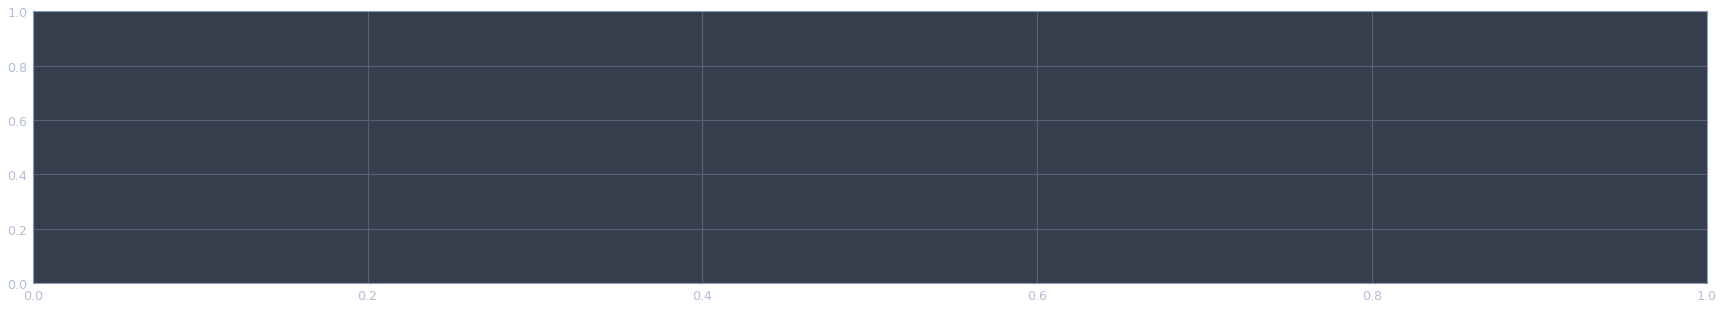

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1, 1,figsize=(30,5))
ax.scatter(slice_A.obsm['tdr_spatial'][:,0,slice_A.obsm['tdr_spatial'][:,-1]==np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]],slice_A.obsm['tdr_spatial'][:,1,slice_A.obsm['tdr_spatial'][:,-1]==np.unique(slice_A.obsm['tdr_spatial'][:,-1])[0]])

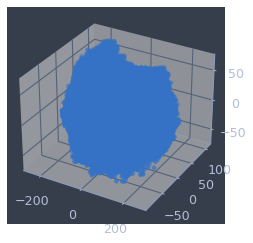

In [7]:
%matplotlib inline
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(slice_A.obsm['tdr_spatial'][:,0],slice_A.obsm['tdr_spatial'][:,1],slice_A.obsm['tdr_spatial'][:,2])

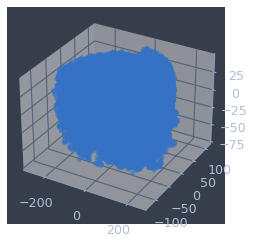

In [8]:
%matplotlib inline
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(slice_B.obsm['tdr_spatial'][:,0],slice_B.obsm['tdr_spatial'][:,1],slice_B.obsm['tdr_spatial'][:,2])

In [9]:
def plot_slices(sliceA_align, sliceB_align, axs, spatial_key, slice_colors,dot_size):
    xmin,xmax = np.min([np.min(sliceB_align.obsm[spatial_key][:,0]),np.min(sliceA_align.obsm[spatial_key][:,0])]),np.max([np.max(sliceB_align.obsm[spatial_key][:,0]),np.max(sliceA_align.obsm[spatial_key][:,0])])
    ymin,ymax = np.min([np.min(sliceB_align.obsm[spatial_key][:,1]),np.min(sliceA_align.obsm[spatial_key][:,1])]),np.max([np.max(sliceB_align.obsm[spatial_key][:,1]),np.max(sliceA_align.obsm[spatial_key][:,1])])
    # dot_size = 8
    margin = 20
    axs[0].scatter(sliceA_align.obsm[spatial_key][:,0],sliceA_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[0].set_xlim([xmin-margin,xmax+margin])
    axs[0].set_ylim([ymin-margin,ymax+margin])
    axs[0].axis('equal')
    axs[1].scatter(sliceB_align.obsm[spatial_key][:,0],sliceB_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[1].set_xlim([xmin-margin,xmax+margin])
    axs[1].set_ylim([ymin-margin,ymax+margin])
    axs[1].set_yticklabels([])
    axs[1].axis('equal')
    axs[2].scatter(sliceA_align.obsm[spatial_key][:,0],sliceA_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[2].scatter(sliceB_align.obsm[spatial_key][:,0],sliceB_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[0])
    axs[2].set_xlim([xmin-margin,xmax+margin])
    axs[2].set_ylim([ymin-margin,ymax+margin])
    axs[2].set_yticklabels([])
    axs[2].axis('equal')

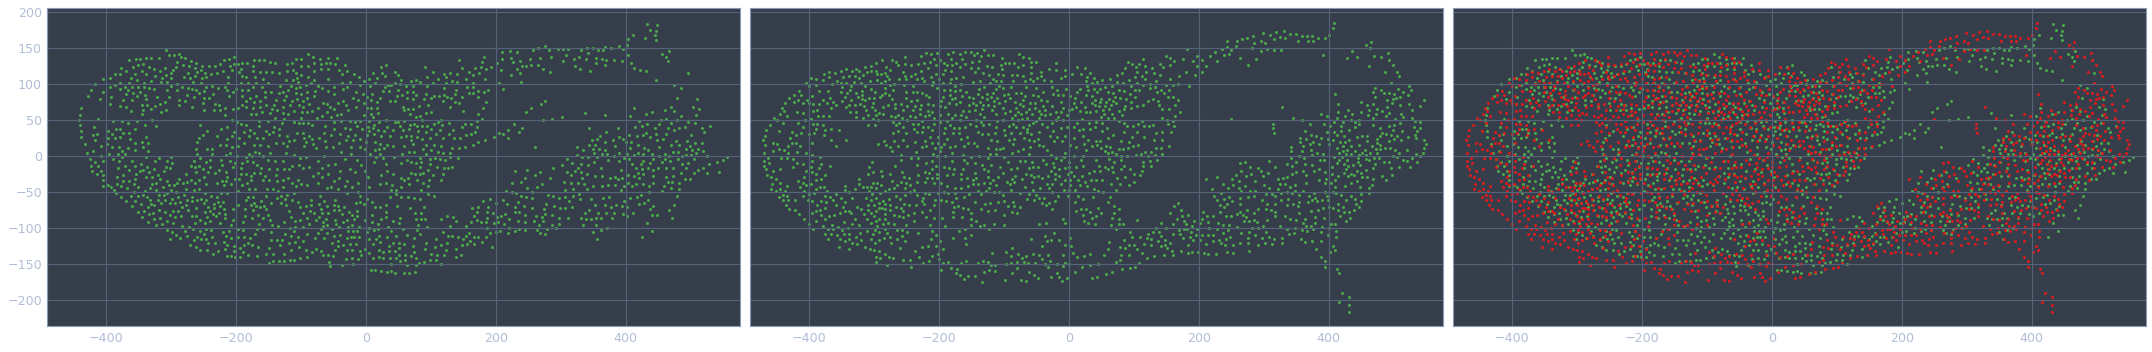

In [36]:
%matplotlib inline
fig, ax = plt.subplots(1, 3,figsize=(30,5))
plot_slices(new_slices[0], new_slices[1],ax,'spatial',slice_colors)
plt.tight_layout()
plt.show()

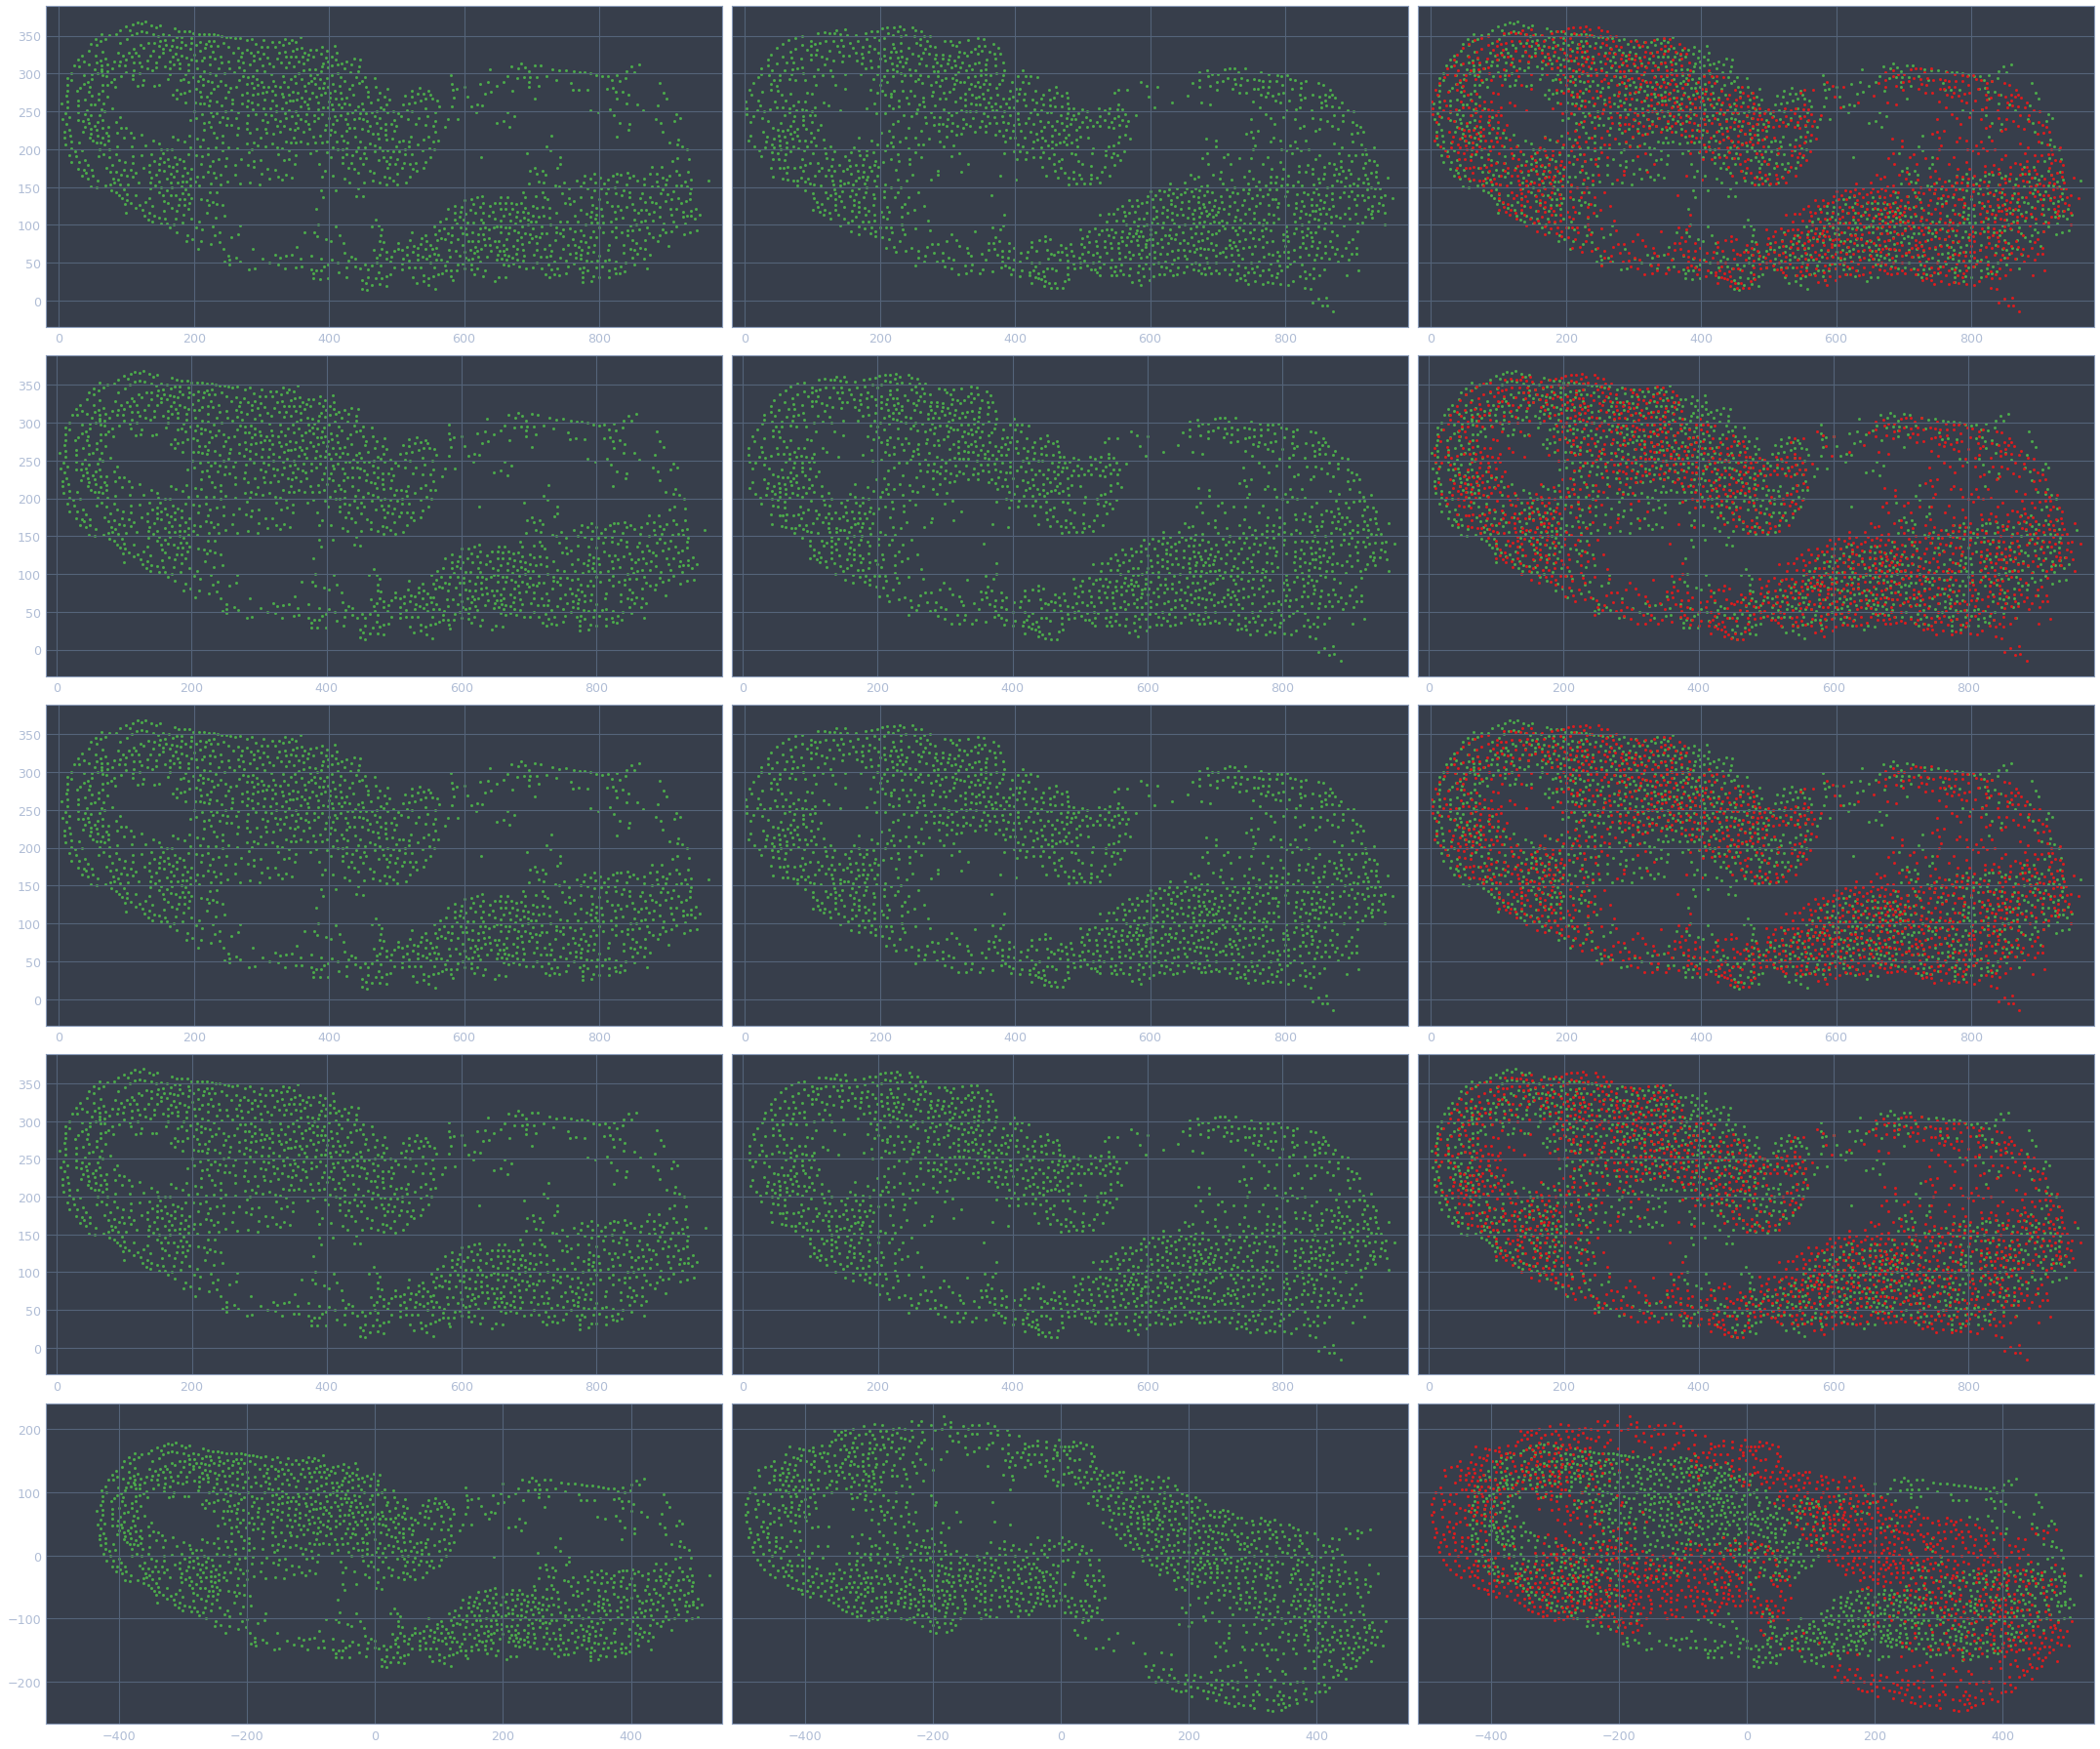

In [95]:
%matplotlib inline
fig, axs = plt.subplots(5, 3,figsize=(30,25))
plot_slices(sliceA_align, sliceB_align,axs[0],'align_spatial',slice_colors)
plot_slices(sliceA_align_SVI, sliceB_align_SVI,axs[1],'align_spatial',slice_colors)
plot_slices(sliceA_align_GPU, sliceB_align_GPU,axs[2],'align_spatial',slice_colors)
plot_slices(sliceA_align_GPU_SVI, sliceB_align_GPU_SVI,axs[3],'align_spatial',slice_colors)
plot_slices(new_slices[0], new_slices[1],axs[4],'spatial',slice_colors)
plt.tight_layout()
plt.show()

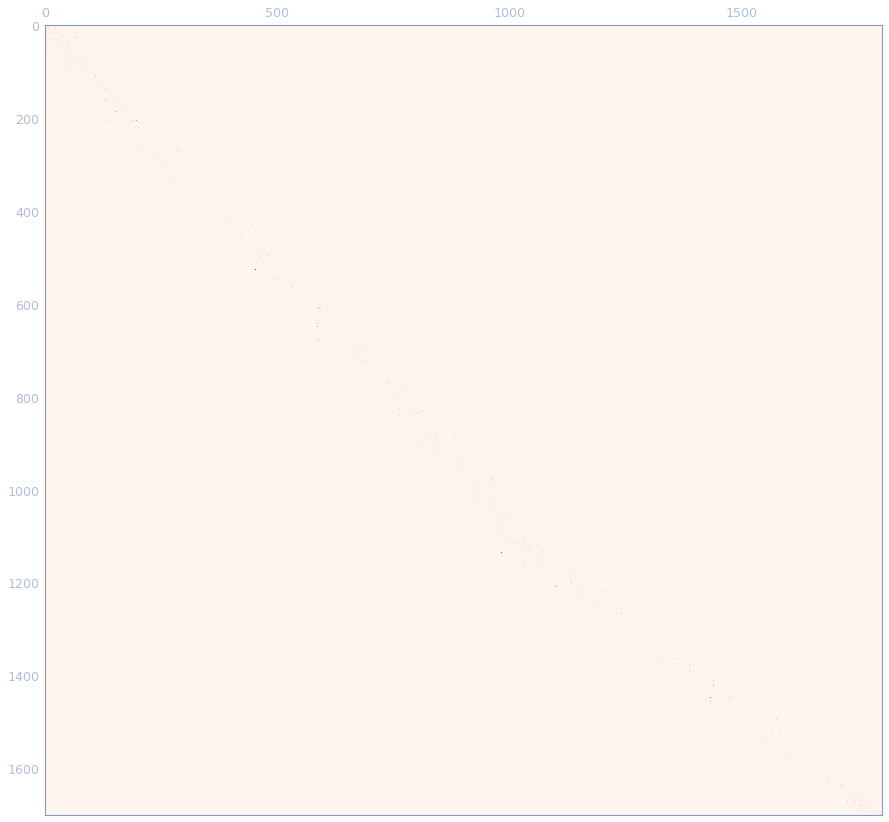

In [96]:
%matplotlib inline
vis_P = P.T.copy()
vis_P = vis_P / np.max(vis_P)
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(vis_P, cmap="Reds")
# ax.axis('off')
ax.grid(False)
plt.show()

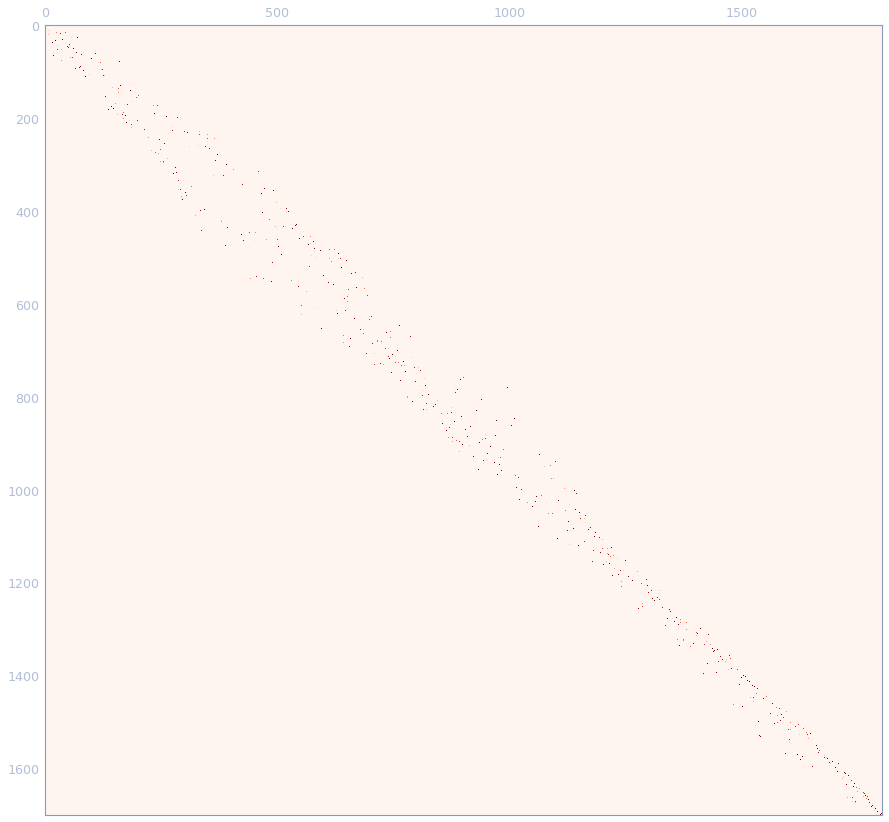

In [97]:
%matplotlib inline
vis_P = pi.copy()
vis_P = vis_P / np.max(vis_P)
vis_P[vis_P < 0.05] = 0
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(vis_P, cmap="Reds")
ax.grid(False)
plt.show()